In [1]:
import numpy as np
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats

np.set_printoptions(precision=3)

## Fisher's exact test

We will start with a story.

https://en.wikipedia.org/wiki/Muriel_Bristol

One day at Rothamsted, Ronald Fisher offered Bristol a cup of hot tea that he had just drawn from an urn. Bristol declined it, saying that she preferred the flavour when the milk was poured into the cup before the tea. Fisher scoffed that the order of pouring could not affect the flavour. Bristol insisted that it did and that she could tell the difference. Overhearing this debate, William Roach said, "Let's test her."

Fisher and Roach hastily put together an experiment to test Bristol's ability to identify the order in which the two liquids were poured into several cups. At the conclusion of this experiment in which she correctly identified all eight, Roach proclaimed that "Bristol divined correctly more than enough of those cups into which tea had been poured first to prove her case".

This incident led Fisher to do important work in the design of statistically valid experiments based on the statistical significance of experimental results. He developed Fisher's exact test to assess the probabilities and statistical significance of experiments. 

### Ronald Fisher

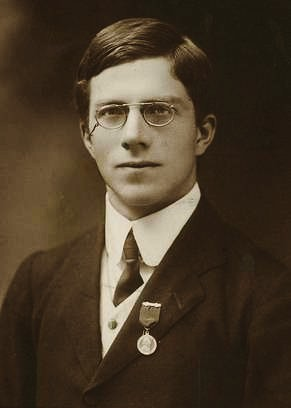

The father of modern Statistics.
https://en.wikipedia.org/wiki/Ronald_Fisher


### The Fisher's exact test

Also known as the $\bf{permutation\ test}$.
https://en.wikipedia.org/wiki/Fisher%27s_exact_test

There are other, more sophisticated tests nowdays, but this was the original idea.
https://en.wikipedia.org/wiki/Cochran%E2%80%93Mantel%E2%80%93Haenszel_statistics

So let's have two groups:

1. Treated
2. Control

The outcomes may be categorical, hit or miss, cured or not, correct about milk or tea first, 0 or 1, etc.

Let's have the following data:

Treated: 0,1,0,1,1,0,0,1,0,0

4 ones, 6 zeros


Control: 0,1,0,0,1,0,0,0

2 ones, 6 zeros

Are the significantly more 1s in the Treated group?

Let's formulate our zero hypothesis:

$H_0$: There is not difference between the two groups.

$H_0$: There are significantly more 1s in the treated group.

#### The test:

If $H_0$ is correct, then the difference is obtained by chance, by random sampling from the same distribution.

If the results in the Treated and Control group are from the same distribution, mixing the two should not change anything, not change the sampling.

The procedure for the test is as follows:

1. Mix the data together.
2. Split the data randomly in two groups "Treated" and "Control". If $H_0$ is true, these splits are statistically the same as the original result.
3. Calculate the differences of $\bar{x}_t-\bar{x}_c$ for each split.
4. Get the distribtuion of these differences.
5. Find the p-value of the original sample difference, i.e. the difference between the really Treated and Control groups, using thi distribution obtained in 4.


In [8]:
#Let;'s do our example

#These are our results of the study

treated=np.array([0,1,0,1,1,1,0,1,0,1])

control=np.array([0,1,0,0,1,0,0,0,0,0,0,0,0])

#The observed difference is
observed_difference=treated.mean()-control.mean()
print("The mean of the Treated group is",treated.mean())
print("The mean of the Control group is",control.mean())
print("The observed difference is",observed_difference)

The mean of the Treated group is 0.6
The mean of the Control group is 0.15384615384615385
The observed difference is 0.4461538461538461


In [9]:
#Let's put the Treated and Control together
all_together=np.concatenate((treated,control),axis=0)
all_together

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
#Now split the two group randomly many times
#
#First create a permutation, then split on len(treated) and len(control)
#What's the numbers of perumations of 18 elements?
#18!
print("The number of premutations is",np.math.factorial(len(treated)+len(control)))

#let's use 100000
number_of_splits=1000000
differences=np.zeros(number_of_splits)
all_copy=all_together
for i in range(number_of_splits):
    np.random.shuffle(all_copy) #Shuffle it
    fake_treated=all_copy[:len(treated)]
    fake_control=all_copy[len(treated):]
    differences[i]=fake_treated.mean()-fake_control.mean()


The number of premutations is 25852016738884976640000


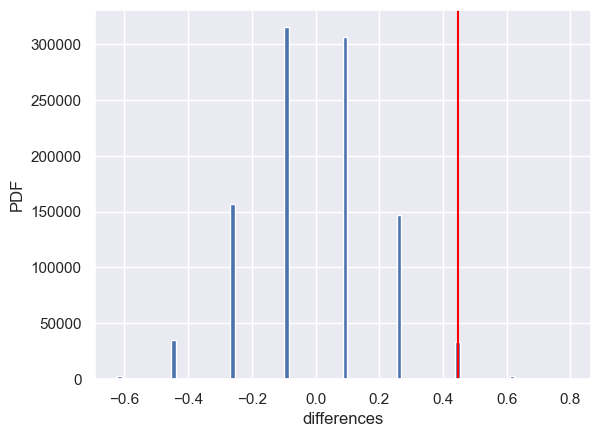

In [ ]:
fig=plt.hist(differences,bins=100,align='left')
plt.xlabel('differences')
plt.ylabel('PDF')
plt.axvline(x=observed_difference, color='red');

In [17]:
#All we have to do now is count how many are there on the right of the red line, 
#and caluclate the ratio to the total

p_value = np.sum(differences >= observed_difference)/differences.size
print(differences.size)
print("The p-value for the difference is",p_value)

1000000
The p-value for the difference is 0.036811
